In [1]:
import sys,os,glob,copy
sys.path.append('../')
import numpy as np
from numpy.linalg import norm
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.interpolate import LinearNDInterpolator,interp2d
import scipy
import matplotlib as mpl
from matplotlib.colors import LogNorm
from IPython.display import display, Markdown
from collections import OrderedDict
import pylhe
import glob
import pyslha
import ROOT
import xml.etree.ElementTree as ET


plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

plt.rcParams.update({"savefig.dpi" : 300}) #Figure resolution


#Define plotting style:
sns.set() #Set style
sns.set_style('ticks',{'font.family':'Times New Roman', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
cm = plt.cm.get_cmap('RdYlBu')

Welcome to JupyROOT 6.26/10


In [4]:
inputFiles = {'pseudoscalar_10': '../DMSimp_pseudoscalar_width_scan/Events/run_01/unweighted_events.lhe.gz',
              'pseudoscalar_50': '../DMSimp_pseudoscalar_width_scan/Events/run_02/unweighted_events.lhe.gz',
              'pseudoscalar_100': '../DMSimp_pseudoscalar_width_scan/Events/run_03/unweighted_events.lhe.gz',
              'pseudoscalar_150': '../DMSimp_pseudoscalar_width_scan/Events/run_04/unweighted_events.lhe.gz',
              'pseudoscalar_200': '../DMSimp_pseudoscalar_width_scan/Events/run_05/unweighted_events.lhe.gz',
              'pseudoscalar_250': '../DMSimp_pseudoscalar_width_scan/Events/run_06/unweighted_events.lhe.gz',
              'pseudoscalar_300': '../DMSimp_pseudoscalar_width_scan/Events/run_07/unweighted_events.lhe.gz',
              'pseudoscalar_350': '../DMSimp_pseudoscalar_width_scan/Events/run_08/unweighted_events.lhe.gz',
              'pseudoscalar_400': '../DMSimp_pseudoscalar_width_scan/Events/run_09/unweighted_events.lhe.gz',
              'pseudoscalar_450': '../DMSimp_pseudoscalar_width_scan/Events/run_10/unweighted_events.lhe.gz',
              'pseudoscalar_500': '../DMSimp_pseudoscalar_width_scan/Events/run_11/unweighted_events.lhe.gz',
              'pseudoscalar_550': '../DMSimp_pseudoscalar_width_scan/Events/run_12/unweighted_events.lhe.gz',
              'pseudoscalar_600': '../DMSimp_pseudoscalar_width_scan/Events/run_13/unweighted_events.lhe.gz',
              'pseudoscalar_650': '../DMSimp_pseudoscalar_width_scan/Events/run_14/unweighted_events.lhe.gz',
              'pseudoscalar_700': '../DMSimp_pseudoscalar_width_scan/Events/run_15/unweighted_events.lhe.gz',
              'pseudoscalar_750': '../DMSimp_pseudoscalar_width_scan/Events/run_16/unweighted_events.lhe.gz',
              'pseudoscalar_800': '../DMSimp_pseudoscalar_width_scan/Events/run_17/unweighted_events.lhe.gz',
              'pseudoscalar_850': '../DMSimp_pseudoscalar_width_scan/Events/run_18/unweighted_events.lhe.gz',
              'pseudoscalar_900': '../DMSimp_pseudoscalar_width_scan/Events/run_19/unweighted_events.lhe.gz',
              'pseudoscalar_950': '../DMSimp_pseudoscalar_width_scan/Events/run_20/unweighted_events.lhe.gz',
              'pseudoscalar_1000': '../DMSimp_pseudoscalar_width_scan/Events/run_21/unweighted_events.lhe.gz',}

In [5]:
parameters = {}
for label,file in inputFiles.items():
    banner = sorted(glob.glob(os.path.dirname(file)+'/*banner.txt'),key=os.path.getmtime,reverse=True)
    if len(banner) == 0:
        print('Banner not found for %s' %label)
    elif len(banner) > 1:        
        print('\n%i banner files found for %s. Using %s' 
              %(len(banner),label,os.path.basename(banner[0])))
    banner = banner[0]
    xtree = ET.parse(banner)
    xroot = xtree.getroot()
    slha = xroot.find('header').find('slha').text
    pars = pyslha.readSLHA(slha)
    if 55 in pars.blocks['MASS']:
        model = 'spin1'
        mMed = pars.blocks['MASS'][55]
    elif 54 in pars.blocks['MASS']:
        model = 'spin0'
        mMed = pars.blocks['MASS'][54]
        
    mDM = pars.blocks['MASS'][52]
    if model == 'spin1':
        gVq = pars.blocks['DMINPUTS'][4] # Mediator-quark vector coupling
        gAq = pars.blocks['DMINPUTS'][10] # Mediator-quark axial coupling
        gVx = pars.blocks['DMINPUTS'][2] # Mediator-DM vector coupling
        gAx = pars.blocks['DMINPUTS'][3] # Mediator-DM axial coupling
        gammaMed = pars.decays[55].totalwidth  # Mediator total width
    elif model == 'spin0':
        gVq = pars.blocks['DMINPUTS'][6] # Mediator-quark scalar coupling
        gAq = pars.blocks['DMINPUTS'][12] # Mediator-quark pseudoscalar coupling
        gVx = pars.blocks['DMINPUTS'][3] # Mediator-DM scalar coupling
        gAx = pars.blocks['DMINPUTS'][4] # Mediator-DM pseudoscalar coupling
        gammaMed = pars.decays[54].totalwidth # Mediator total width
        
        
    parameters[label] = {'mMed' : mMed, 'mDM' : mDM, 
                         'gVq' : gVq, 'gAq' : gAq, 'gVx' : gVx, 'gAx' : gAx, 'gammaMed': gammaMed}
    print(label,': mMed = %1.2f GeV, mDM = %1.2f GeV' %(mMed,mDM))

pseudoscalar_10 : mMed = 10.00 GeV, mDM = 200.00 GeV
pseudoscalar_50 : mMed = 50.00 GeV, mDM = 200.00 GeV
pseudoscalar_100 : mMed = 100.00 GeV, mDM = 200.00 GeV
pseudoscalar_150 : mMed = 150.00 GeV, mDM = 200.00 GeV
pseudoscalar_200 : mMed = 200.00 GeV, mDM = 200.00 GeV
pseudoscalar_250 : mMed = 250.00 GeV, mDM = 200.00 GeV
pseudoscalar_300 : mMed = 300.00 GeV, mDM = 200.00 GeV
pseudoscalar_350 : mMed = 350.00 GeV, mDM = 200.00 GeV
pseudoscalar_400 : mMed = 400.00 GeV, mDM = 200.00 GeV
pseudoscalar_450 : mMed = 450.00 GeV, mDM = 200.00 GeV
pseudoscalar_500 : mMed = 500.00 GeV, mDM = 200.00 GeV
pseudoscalar_550 : mMed = 550.00 GeV, mDM = 200.00 GeV
pseudoscalar_600 : mMed = 600.00 GeV, mDM = 200.00 GeV
pseudoscalar_650 : mMed = 650.00 GeV, mDM = 200.00 GeV
pseudoscalar_700 : mMed = 700.00 GeV, mDM = 200.00 GeV
pseudoscalar_750 : mMed = 750.00 GeV, mDM = 200.00 GeV
pseudoscalar_800 : mMed = 800.00 GeV, mDM = 200.00 GeV
pseudoscalar_850 : mMed = 850.00 GeV, mDM = 200.00 GeV
pseudoscalar_9

In [9]:
#colors = {label : sns.color_palette('deep')[i+1] for i,label in enumerate(parameters.keys())}

In [10]:
massPts = [parameters[label]['mMed'] for label in parameters]
widthPts = [parameters[label]['gammaMed'] for label in parameters]

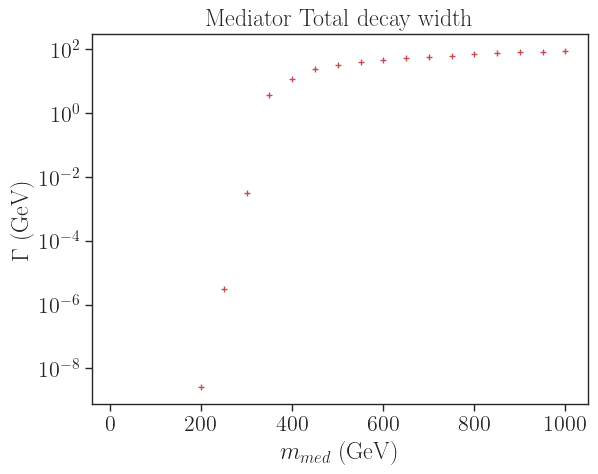

In [20]:
plt.plot(massPts, widthPts, 'r+')

plt.yscale('log')

plt.xlabel(r'$m_{med}$ (GeV)')
plt.ylabel(r'$\Gamma$ (GeV)')
plt.title(r'Mediator Total decay width')


plt.show()